In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ../src

/Users/alessandro.romualdi/projects/gionni/40_FPUT/fput/src


In [3]:
from classes import FPU
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np 
from sklearn.preprocessing import StandardScaler

# System inputs

In [4]:
NUM_ATOMS = 32  # number of particles equals to N in FPUT equations
T_MAX = 30000   # maximum time of simulation
INTEGRATION_TIME_STEP = 0.1
INITIAL_MODE_NUMBER=1
NUM_MODES = 3  # number of modes to be observed
ALPHA_REF = 1
BETA_REF = 2

## compute initial energy mode 1

Here we estimate the initial mode amplitude provide to the system (mode 1), in order to reach the target 
target initial energy of 10^-4, as reported in the book "Large Deviations in Physics_ The Legacy of the Law of Large Numbers-Springer-Verl" pag. 40.

In [6]:
fpu = FPU(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=0.1608,
    t_step=INTEGRATION_TIME_STEP,
    t_max=T_MAX,
    alpha=ALPHA_REF,
    beta=BETA_REF
)

fpu._compute_mode_energy(fpu.q[:, 0], fpu.p[:, 0], 1)/32

1.4470035691088259e-05

So we estimate that an initial mode amplitude of 0.1608, correspond of about 10^-4 initial energy to the system

In [ ]:
INITIAL_MODE_AMPLITUDE = 0.1608 # as estimated above

# RUN FPU with verlet algo


# Using alpha and beta 0. No Ergodicity

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37499/37499 [00:19<00:00, 1878.66it/s]


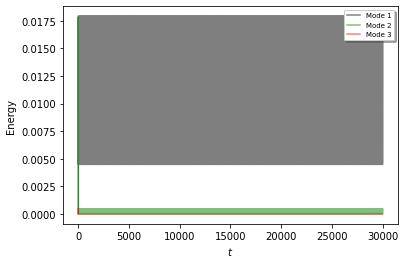

In [22]:
fpu = FPU(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=1,
    t_step=0.8,
    t_max=T_MAX,
    alpha=0,
    beta=0
)

# run
time_steps, q, p, mode_energies = fpu.run(method="verlet")

# plots
plt.plot(time_steps, mode_energies[0, :],'k-', linewidth=1.5, label='Mode 1', alpha=0.5)
plt.plot(time_steps, mode_energies[1, :],'g-', linewidth=1.5, label='Mode 2', alpha=0.5)
plt.plot(time_steps, mode_energies[2, :],'r-', linewidth=1.5, label='Mode 3', alpha=0.5)

plt.xlabel('$t$ ')
plt.ylabel('Energy ')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')
#plt.savefig(f'../notebooks/output/fput_init_mode_en_{INITIAL_MODE_AMPLITUDE}.pdf')
plt.show()

### Plot average mode energies

Text(0.5, 1.0, 'average mode energies. Initial amplitude = 0.1608 ')

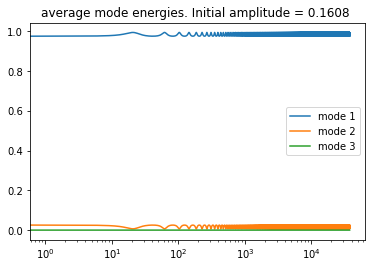

In [23]:
tot_energy = mode_energies.sum(axis=0)
plt.semilogx(mode_energies[0, :] / tot_energy, label="mode 1")
plt.semilogx(mode_energies[1, :] / tot_energy, label="mode 2")
plt.semilogx(mode_energies[2, :] / tot_energy, label="mode 3")
plt.legend()
plt.title(f"average mode energies. Initial amplitude = {INITIAL_MODE_AMPLITUDE} ")
#plt.savefig(f'../notebooks/output/avg_mode_en_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

### PCA

[5.00003161e-01 4.99996839e-01 1.03578410e-26 6.51936958e-27
 3.29667096e-27]


Text(0.5, 1.0, 'Explained variance ratios. Init amp = 0.1608')

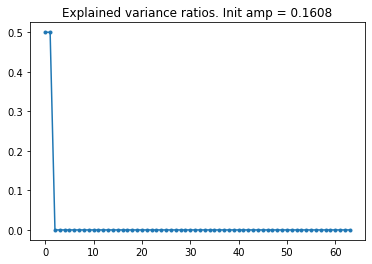

In [24]:
scaler = StandardScaler()

X = np.concatenate([q.T, p.T], axis=1)
X = scaler.fit_transform(X)

pca = PCA(n_components=64)
X_tr = pca.fit_transform(X)

print(pca.explained_variance_ratio_[:5])
plt.plot(pca.explained_variance_ratio_, ".-")

plt.title(f"Explained variance ratios. Init amp = {INITIAL_MODE_AMPLITUDE}")
#plt.savefig(f'../notebooks/output/exp_var_ratio_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

## A scatter plot of the first two PCs¶

Text(0.5, 1.0, 'PC1 vs PC2. Init amp = 1')

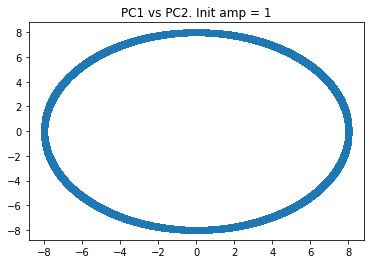

In [27]:
plt.scatter(X_tr[:, 0], X_tr[:, 1])
plt.title("PC1 vs PC2. Init amp = 1")

## Using low initial mode amplitude. No ergodicity

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37499/37499 [00:19<00:00, 1899.88it/s]


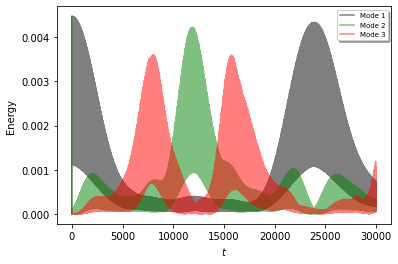

In [36]:
fpu = FPU(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=0.5,
    t_step=0.8,
    t_max=T_MAX,
    alpha=ALPHA_REF,
    beta=BETA_REF
)

# run
time_steps, q, p, mode_energies = fpu.run(method="verlet")

# plots
plt.plot(time_steps, mode_energies[0, :],'k-', linewidth=1.5, label='Mode 1', alpha=0.5)
plt.plot(time_steps, mode_energies[1, :],'g-', linewidth=1.5, label='Mode 2', alpha=0.5)
plt.plot(time_steps, mode_energies[2, :],'r-', linewidth=1.5, label='Mode 3', alpha=0.5)

plt.xlabel('$t$ ')
plt.ylabel('Energy ')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')
#plt.savefig(f'../notebooks/output/fput_init_mode_en_{INITIAL_MODE_AMPLITUDE}.pdf')
plt.show()

### Plot average mode energies

Text(0.5, 1.0, 'average mode energies. Initial amplitude = 0.1608 ')

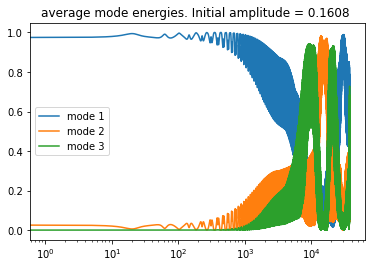

In [37]:
tot_energy = mode_energies.sum(axis=0)
plt.semilogx(mode_energies[0, :] / tot_energy, label="mode 1")
plt.semilogx(mode_energies[1, :] / tot_energy, label="mode 2")
plt.semilogx(mode_energies[2, :] / tot_energy, label="mode 3")
plt.legend()
plt.title(f"average mode energies. Initial amplitude = {INITIAL_MODE_AMPLITUDE} ")
#plt.savefig(f'../notebooks/output/avg_mode_en_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

### PCA

[0.35844776 0.15511158 0.09442831 0.0917535  0.07847195]


Text(0.5, 1.0, 'Explained variance ratios. Init amp = 0.1608')

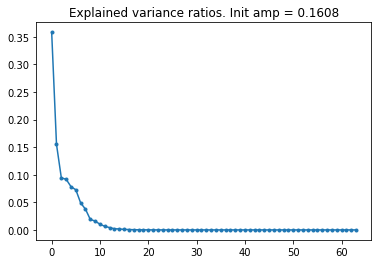

In [38]:
scaler = StandardScaler()

X = np.concatenate([q.T, p.T], axis=1)
X = scaler.fit_transform(X)

pca = PCA(n_components=64)
X_tr = pca.fit_transform(X)

print(pca.explained_variance_ratio_[:5])
plt.plot(pca.explained_variance_ratio_, ".-")

plt.title(f"Explained variance ratios. Init amp = {INITIAL_MODE_AMPLITUDE}")
#plt.savefig(f'../notebooks/output/exp_var_ratio_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

### A scatter plot of the first two PCs

Text(0.5, 1.0, 'PC1 vs PC2. Init amp = 1')

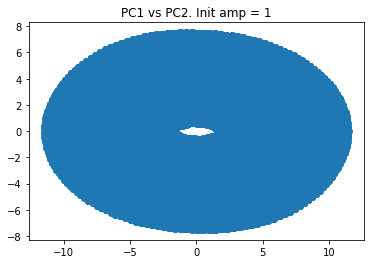

In [39]:
plt.scatter(X_tr[:, 0], X_tr[:, 1])
plt.title("PC1 vs PC2. Init amp = 1")
#plt.savefig(f'../notebooks/output/pc1_and_pc2_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

## Using high initial mode amplitude. Ergodicity

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37499/37499 [00:19<00:00, 1903.05it/s]


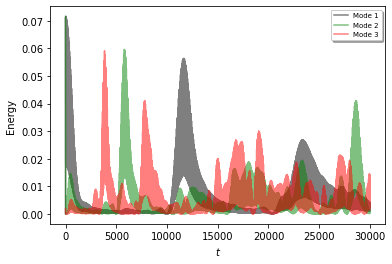

In [51]:
INITIAL_MODE_AMPLITUDE = 2

fpu = FPU(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
    t_step=0.8,
    t_max=T_MAX,
    alpha=ALPHA_REF,
    beta=BETA_REF
)

#run 
time_steps, q, p, mode_energies = fpu.run(method="verlet")

# plots
plt.plot(time_steps, mode_energies[0, :],'k-', linewidth=1.5, label='Mode 1', alpha=0.5)
plt.plot(time_steps, mode_energies[1, :],'g-', linewidth=1.5, label='Mode 2', alpha=0.5)
plt.plot(time_steps, mode_energies[2, :],'r-', linewidth=1.5, label='Mode 3', alpha=0.5)

plt.xlabel('$t$ ')
plt.ylabel('Energy ')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')
plt.show()

### Average mode energies 

Text(0.5, 1.0, 'average mode energies. Initial amplitude = 2 ')

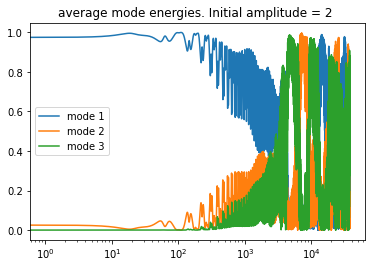

In [52]:
tot_energy = mode_energies.sum(axis=0)
plt.semilogx(mode_energies[0, :] / tot_energy, label="mode 1")
plt.semilogx(mode_energies[1, :] / tot_energy, label="mode 2")
plt.semilogx(mode_energies[2, :] / tot_energy, label="mode 3")
plt.legend()
plt.title(f"average mode energies. Initial amplitude = {INITIAL_MODE_AMPLITUDE} ")
#plt.savefig(f'../notebooks/output/avg_mode_en_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

### PCA

[0.3054098  0.08257568 0.07076908 0.05803418 0.05441618]


Text(0.5, 1.0, 'Explained variance ratios. Init amp = 2')

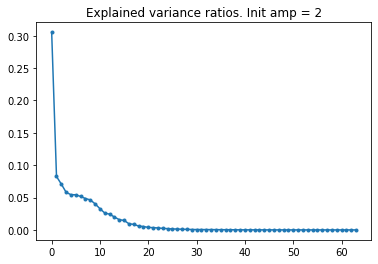

In [53]:
scaler = StandardScaler()

X = np.concatenate([q.T, p.T], axis=1)
X = scaler.fit_transform(X)

pca = PCA(n_components=64)
X_tr = pca.fit_transform(X)

print(pca.explained_variance_ratio_[:5])
plt.plot(pca.explained_variance_ratio_, ".-")

plt.title(f"Explained variance ratios. Init amp = {INITIAL_MODE_AMPLITUDE}")
#plt.savefig(f'../notebooks/output/exp_var_ratio_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

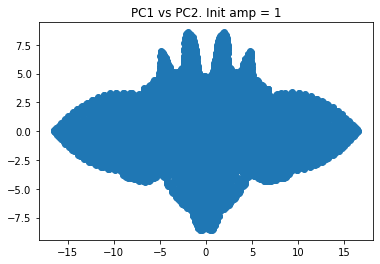

In [54]:
plt.scatter(X_tr[:, 0], X_tr[:, 1])
plt.title("PC1 vs PC2. Init amp = 1")
plt.savefig(f'../notebooks/output/pc1_and_pc2_init_amp_{INITIAL_MODE_AMPLITUDE}.pdf')

# Compute PCs vs initial energies

Here we compute the principal components, varyin the initial energy. Varying the initial energy from low to high, we expect phase transition between non-ergotic to ergotic. Therefore we ideally observe the PCs to have higher value to low component for low initial energy (ergotic) and more distributed values for high high energy (ergocit)

In [61]:
scaler = StandardScaler()

explained_variance_ratio_vs_energy = list()

for INITIAL_MODE_AMPLITUDE in np.arange(0.1, 2.0, 0.1, dtype=float):
    INITIAL_MODE_AMPLITUDE_ = INITIAL_MODE_AMPLITUDE/10
    fpu = FPU(
        num_atoms=NUM_ATOMS,
        num_modes=NUM_MODES,
        initial_mode_number=INITIAL_MODE_NUMBER,
        initial_mode_amplitude=INITIAL_MODE_AMPLITUDE_,
        t_step=0.8,
        t_max=T_MAX,
        alpha=ALPHA_REF,
        beta=BETA_REF
    )
    
    time_steps, q, p, mode_energies = fpu.run()
    
    X = np.concatenate([q.T, p.T], axis=1)
    X = scaler.fit_transform(X)
    pca = PCA(n_components=64)
    X_tr = pca.fit_transform(X)

    explained_variance_ratio_vs_energy.append(pca.explained_variance_ratio_)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37499/37499 [00:20<00:00, 1793.29it/s]


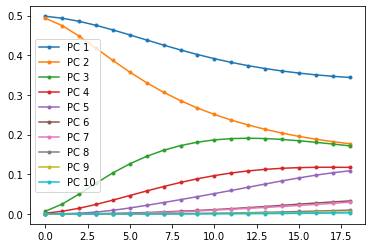

In [63]:
for i in range(10):
    plt.plot(np.array(explained_variance_ratio_vs_energy)[:, i], ".-", label=f"PC {i+1}")

plt.legend();

# RUN FPU with Runge-Kutta algo, using alpha and beta from reference. No ergodicity

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 1274.34it/s]


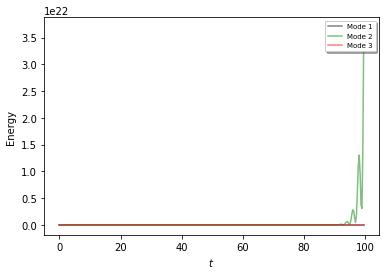

In [65]:
INITIAL_MODE_AMPLITUDE = 1

fpu = FPU(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
    t_step=0.3,
    t_max=1e2,
    alpha=0,
    beta=0
)

# run
time_steps, q, p, mode_energies = fpu.run(method="runge-kutta")

# plots
plt.plot(time_steps, mode_energies[0, :],'k-', linewidth=1.5, label='Mode 1', alpha=0.5)
plt.plot(time_steps, mode_energies[1, :],'g-', linewidth=1.5, label='Mode 2', alpha=0.5)
plt.plot(time_steps, mode_energies[2, :],'r-', linewidth=1.5, label='Mode 3', alpha=0.5)

plt.xlabel('$t$ ')
plt.ylabel('Energy ')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-small')
plt.show()